In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

In [46]:
data = pd.read_csv('placement.csv')
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='cgpa', ylabel='Density'>

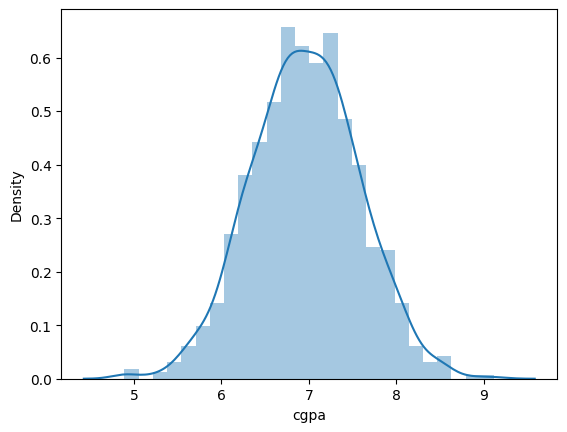

In [47]:
sb.distplot(data['cgpa'])

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

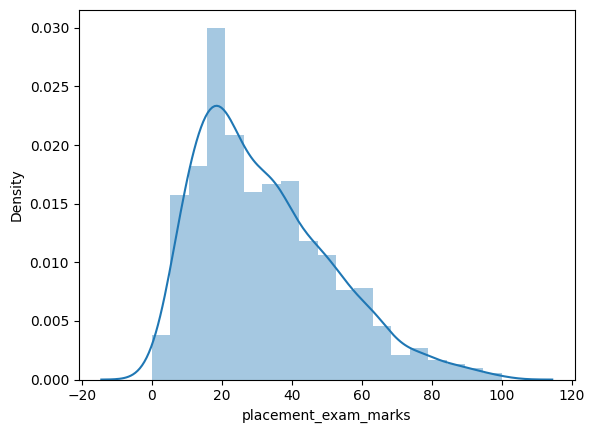

In [48]:
sb.distplot(data['placement_exam_marks'])

#**now we are going to handle Outliers using Z-Score**

#**first we calculate the boundary values**

to find the boundary values, we need to use :

for highest boundary value : mean + 3 * StandardDeviation
for lowest boundary value : mean - 3 * StandardDeviation

In [49]:
print('highest value is :',data['cgpa'].mean() + 3*data['cgpa'].std())
print('lowest value is :',data['cgpa'].mean() - 3*data['cgpa'].std())

highest value is : 8.808933625397168
lowest value is : 5.113546374602832


In [50]:
highest_value = data['cgpa'].mean() + 3*data['cgpa'].std()
lowest_value = data['cgpa'].mean() - 3*data['cgpa'].std()

#**finding the outliners**

In [51]:
data[(data['cgpa'] > highest_value) | (data['cgpa'] < lowest_value)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


#**handling ouliers using :**

#**1. by removing / dropping / trimming the outliers columns**

#**1.1 using pandas dataframe's column manipulation method**

In [52]:
data.shape

(1000, 3)

In [56]:
new_data = data[(data['cgpa'] < highest_value) & (data['cgpa'] > lowest_value)]
new_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [57]:
new_data.shape

(995, 3)

#**1.2 using Z-Score method**

In [58]:
data['z_score'] = (data['cgpa'] - data['cgpa'].mean()) / data['cgpa'].std()

In [59]:
data.head()

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


#**2. handling ouliers using Capping method**

In [60]:
data = pd.read_csv('placement.csv')
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [61]:
upper_limit = data['cgpa'].mean() + 3*data['cgpa'].std()
lower_limit = data['cgpa'].mean() - 3*data['cgpa'].std()

upper_limit, lower_limit

(np.float64(8.808933625397168), np.float64(5.113546374602832))

In [64]:
data['cgpa'] = np.where(
    data['cgpa'] > upper_limit,
    upper_limit,
    np.where(
        data['cgpa'] < lower_limit,
        lower_limit,
        data['cgpa']
    )
)


# in the capping method, we can:
# if value is falls under outliers, then if :
# if value is right outlier, then we replace that value with right outlier using mean + 3 * standard deviation
# else if value is left outlier, then we replace that value with left outlier using mean - 3 * standard deviation

In [63]:
data.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
